# An application of Binomial transform

In this notebook we apply the [Binomial transform][on-oeis] to the Fibonacci numbers in order to substain the main [notebook][recurrence-notebook] where these numbers are studied in depth.

[on-oeis]:https://oeis.org/wiki/Binomial_transform
[recurrence-notebook]:http://nbviewer.jupyter.org/github/massimo-nocentini/PhD/blob/master/courses/paa/sympy-notebook/recurrences-unfolding.ipynb?flush_cache=true

In [36]:
import sympy
from sympy import *
from sympy.abc import x, n, z, t, k
    
init_printing() # for nice printing, a-la' TeX

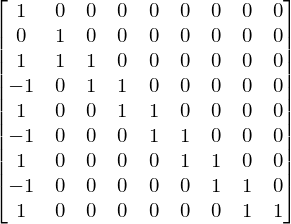

In [26]:
transforming_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [1,1,1,0,0,0,0,0,0],
        [-1,0,1,1,0,0,0,0,0],
        [1,0,0,1,1,0,0,0,0],
        [-1,0,0,0,1,1,0,0,0],
        [1,0,0,0,0,1,1,0,0],
        [-1,0,0,0,0,0,1,1,0],
        [1,0,0,0,0,0,0,1,1]])

transforming_matrix

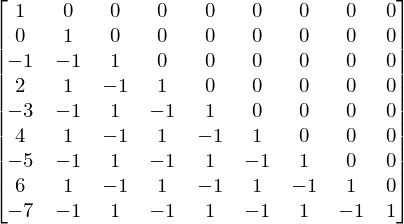

In [28]:
transforming_matrix**(-1)

In [3]:
def gf(t): return t + 1/(1+t)

gf(t).series(n=10)

In [6]:
def h(t): return t*(1+2*t+t**2)/(1+t+t**2)

(gf(t)*h(t)**2).series(n=10)

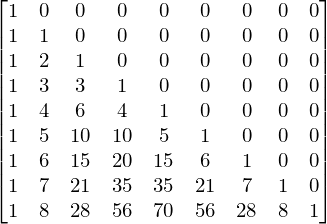

In [7]:
pascal_matrix = Matrix([
        [1,0,0,0,0,0,0,0,0],
        [1,1,0,0,0,0,0,0,0],
        [1,2,1,0,0,0,0,0,0],
        [1,3,3,1,0,0,0,0,0],
        [1,4,6,4,1,0,0,0,0],
        [1,5,10,10,5,1,0,0,0],
        [1,6,15,20,15,6,1,0,0],
        [1,7,21,35,35,21,7,1,0],
        [1,8,28,56,70,56,28,8,1]])
pascal_matrix

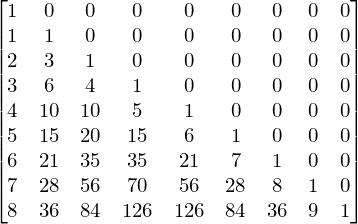

In [8]:
pascal_matrix * transforming_matrix

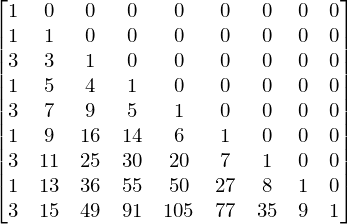

In [9]:
transforming_matrix * pascal_matrix

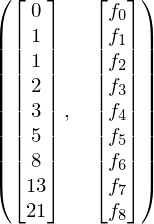

In [22]:
f = IndexedBase('f')

fib_matrix = Matrix([fibonacci(i) for i in range(9)])
fib_matrix_sym = Matrix([f[i] for i in range(9)])

fib_matrix, fib_matrix_sym

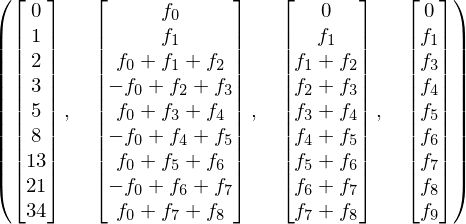

In [32]:
a = Wild('a')
std_prod = transforming_matrix * fib_matrix
sym_prod = transforming_matrix * fib_matrix_sym

std_prod, sym_prod, sym_prod.subs({f[0]:0}), sym_prod.subs({f[0]:0}).replace(f[a]+f[a+1],f[a+2])

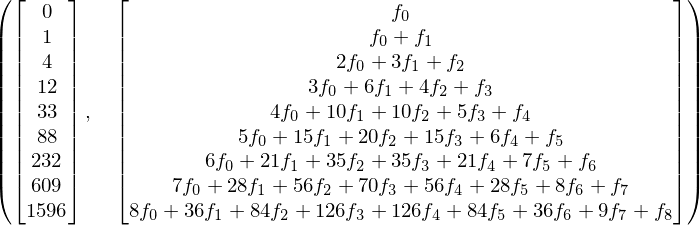

In [40]:
rhs=pascal_matrix * transforming_matrix * fib_matrix
rhs_sym = pascal_matrix * sym_prod
rhs, rhs_sym

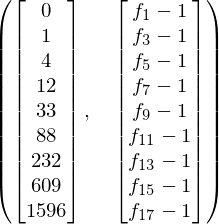

In [41]:
a_range = range(1,18,2)
lhs=Matrix([fibonacci(i) for i in a_range]) - Matrix([1 for i in range(9)])
lhs_sym=Matrix([f[i] for i in a_range]) - Matrix([1 for i in range(9)])
lhs, lhs_sym

In [42]:
Eq(lhs,rhs)

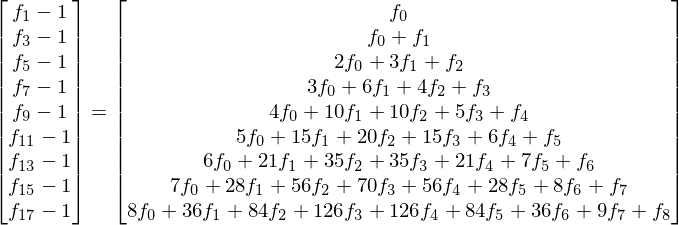

In [44]:
eq_sym = Eq(lhs_sym, rhs_sym)
eq_sym

In [46]:
fibs = {f[i]:fibonacci(i) for i in range(18)}
eq_sym.subs(fibs)